Imports

In [17]:
import numpy as np
from pandas import read_excel, concat, DataFrame, Index, MultiIndex, date_range
from numpy import empty, full
import matplotlib.pyplot as plt
from pathlib import Path


from pandas import read_excel, concat, DataFrame, Index, MultiIndex, date_range
from numpy import empty, full
import matplotlib.pyplot as plt

Load the file

In [18]:
def load(file_name, sheet):
    return read_excel(file_name, sheet_name=sheet)

In [19]:
def load_file(file_name):

    #### Loading the information
    st = load(file_name, 'sites')
    wx = load(file_name, 'weather')
    idx = load(file_name, 'index')

    ### irrigation
#     ir = load(file_name, 'irrigation') \
#             .merge(idx, on='plot', how='right') \
#             .groupby(['DOY', 'hour', 'treatment', "Igross"]) \
#             .reset_index()
            
    ### soil water deficit
    swd = load(file_name, 'soil water deficit') \
            .merge(idx, on='plot', how='right') \
            .groupby(['plot'])
            # .groupby(['DOY', 'SWD_15', 'SWD_30', 'SWD_60', 'SWD_90', 'SWD_120', 'SWD_150', 'SWD_200']) \
            # .reset_index()

    ## growth stage 
    gs = load(file_name, 'growth stage') \
        .merge(idx, on='plot', how='right') \

    return idx, st, swd
#     return st, wx, ir, swd, gs

Build the plots here:

FileNotFoundError: [Errno 2] No such file or directory: '/home/alex/apps/work/hello-azure-world/backend/static/result_2pm_cwsi.png'

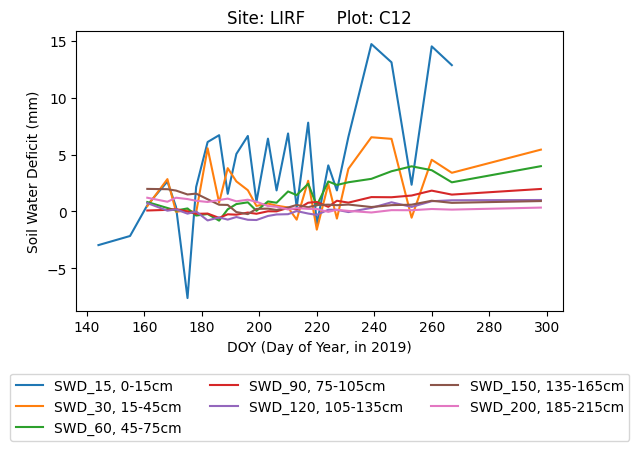

In [22]:
# path = Path(__file__).parent / "../static/data.xlsx"
path = "./static/data.xlsx"

df = read_excel(path)

# grps = plot_wise_stuff(path)
idx, st, swd = load_file(path)
theplots = swd['plot'].all().index.tolist()

alist = []
for thing in theplots:
    alist.append(swd.get_group((str(thing),)))

for i in range(len(theplots)):
    site_name = alist[i]['site'].iloc[0]
    the_year = alist[i]['year'].iloc[0]
    alist[i].plot(x='DOY', y=['SWD_15', 'SWD_30', 'SWD_60', 'SWD_90', 'SWD_120', 'SWD_150', 'SWD_200'], label=['SWD_15, 0-15cm', 'SWD_30, 15-45cm', 'SWD_60, 45-75cm', 'SWD_90, 75-105cm', 'SWD_120, 105-135cm', 'SWD_150, 135-165cm', 'SWD_200, 185-215cm'], title=f"Site: {site_name}      Plot: {theplots[i]}")
    plt.xlabel(f"DOY (Day of Year, in {the_year})")
    plt.ylabel("Soil Water Deficit (mm)")

    legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), frameon=True, ncol=3)
    for text in legend.get_texts():
        text.set_alpha(1.0)  # Set the transparency of the legend text to fully opaque

    plt.tight_layout()
    plt.savefig(f"./static/plot{i}.png")

    plt.show()


In [ ]:
alist[0]['site'].iloc[0]

'LIRF'

In [ ]:
alist[0]

,year,DOY,plot,SWD_15,SWD_30,SWD_60,SWD_90,SWD_120,SWD_150,SWD_200,site,treatment
224,2019,144,C12,-2.950000,NaN,NaN,NaN,NaN,NaN,NaN,LIRF,SWB_90
225,2019,155,C12,-2.150000,NaN,NaN,NaN,NaN,NaN,NaN,LIRF,SWB_90
226,2019,161,C12,0.550000,0.467138,0.829400,0.088195,0.743136,1.984390,1.208635,LIRF,SWB_90
227,2019,168,C12,2.633333,2.843833,0.307653,0.144697,0.072040,1.958561,0.856522,LIRF,SWB_90
228,2019,171,C12,0.400000,-0.025928,0.086549,0.214541,0.188007,1.838373,1.210689,LIRF,SWB_90
229,2019,175,C12,-7.600000,0.121087,0.269677,-0.009285,-0.189783,1.495923,1.091459,LIRF,SWB_90
230,2019,178,C12,2.150000,-0.095159,-0.356226,-0.205256,0.001775,1.569383,0.941107,LIRF,SWB_90
231,2019,182,C12,6.100000,5.554221,-0.218342,-0.182062,-0.784940,1.075890,0.836906,LIRF,SWB_90
232,2019,186,C12,6.700000,0.781450,-0.801384,-0.560893,-0.518202,0.593527,1.004775,LIRF,SWB_90
233,2019,189,C12,1.550000,3.804548,0.194334,-0.244802,-0.712540,0.576265,1.130969,LIRF,SWB_90
